## The Effect of Dropout

Let's see for ourselves how dropout actually affects training. We will use MNIST dataset and a simple convolutional network to do that:

In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


We will define `train` function that will take care of all training process, including:
* Defining the neural network architecture with a given dropout rate `d`
* Specifying suitable training parameters (optimizer and loss function)
* Doing the training and collecting the history

We will then run this function for a bunch of different dropout values:

In [7]:
def train(d):
    print(f"Training with dropout = {d}")
    model = keras.Sequential([
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(d),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
    hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)
    return hist

res = { d : train(d) for d in [0,0.2,0.5,0.8] }

Training with dropout = 0
Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.1949 - acc: 0.9435 - val_loss: 0.0596 - val_acc: 0.9802
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0592 - acc: 0.9816 - val_loss: 0.0433 - val_acc: 0.9857
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0438 - acc: 0.9867 - val_loss: 0.0472 - val_acc: 0.9849
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.0353 - val_acc: 0.9882
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0294 - acc: 0.9910 - val_loss: 0.0305 - val_acc: 0.9894
Training with dropout = 0.2
Epoch 1/5
938/938 [==============================] - 29s 31ms/step - loss: 0.2097 - acc: 0.9377 - val_loss: 0.0655 - val_acc: 0.9781
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0676 - acc: 0.9792 - val_loss: 0.0409 - val_acc: 0.9852
Epoch 3/5
938/9

Now, let's plot validation accuracy graphs for different dropout values to see how fast the training goes:

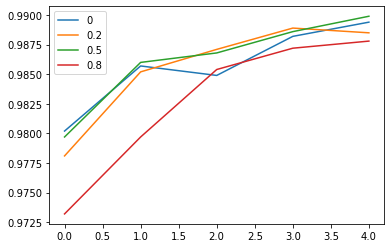

In [16]:
for d,h in res.items():
    plt.plot(h.history['val_acc'],label=str(d))
plt.legend()

From this graph, you would probably be able to see the following:
* Dropout values in the 0.2-0.5 range, you will see the fastest training the best overall results
* Without dropout ($d=0$), you are likely to see less stable and slower training process
* High dropout (0.8) makes things worse